# Jamboree

Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

# Objective:

* To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy
League colleges, considering the unique perspective of Indian applicants.
* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can
provide predictive insights to determine an individual's admission chances based on various variables.

# Column Profiling:

* Serial No.: This column represents the unique row identifier for each applicant in the dataset.
* GRE Scores: This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
* TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language scores of the applicants, which are measured on a scale of 0 to 120.
* University Rating: This column indicates the rating or reputation of the university that the applicants are associated with.
* The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
* SOP: This column represents the strength of the applicant's statement of purpose,rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
* LOR: This column represents the strength of the applicant's letter of recommendation,rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
* CGPA: This column contains the undergraduate Grade Point Average (GPA) of theapplicants, which is measured on a scale of 0 to 10.
* Research: This column indicates whether the applicant has research experience (1) ornot (0).
* Chance of Admit: This column represents the estimated probability or chance ofadmission for each applicant, ranging from 0 to 1.

In [118]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Drop irrelvant columns
df.drop(labels = 'Serial No.',axis = 1,inplace = True)

In [7]:
#shape of the dataset
df.shape

(500, 8)

In [8]:
#checking data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# Using strip() to remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [11]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [12]:
#checking missing values
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [13]:
#checking duplicates
df.duplicated().sum()

0

In [14]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Univariate Analysis

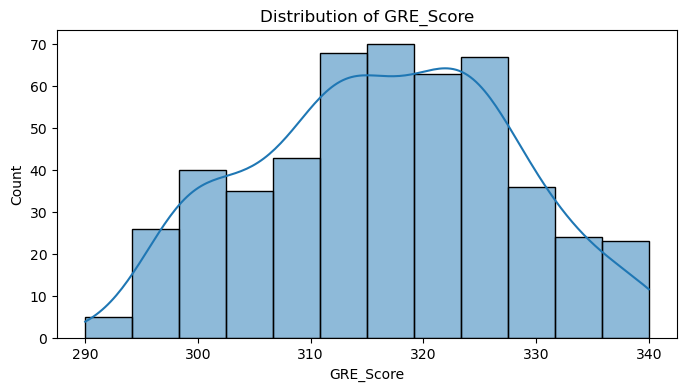

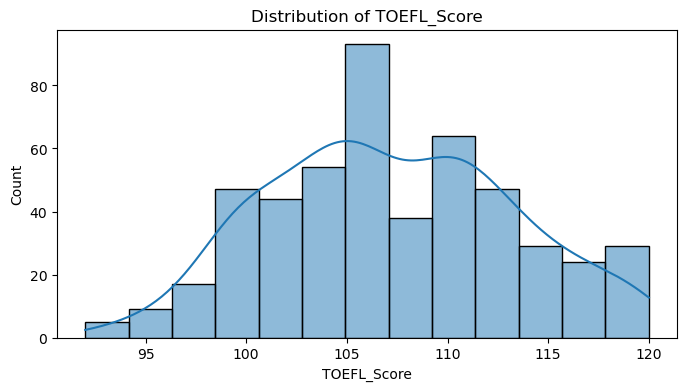

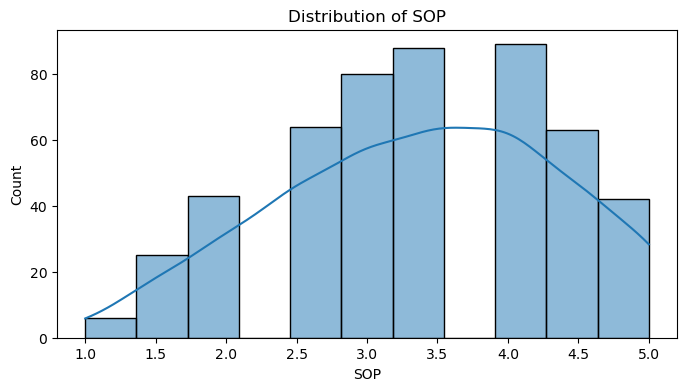

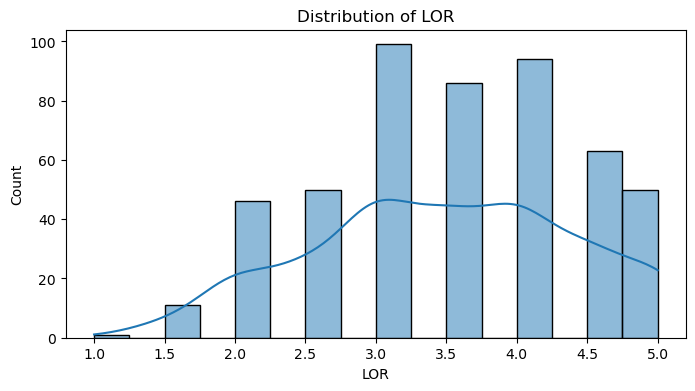

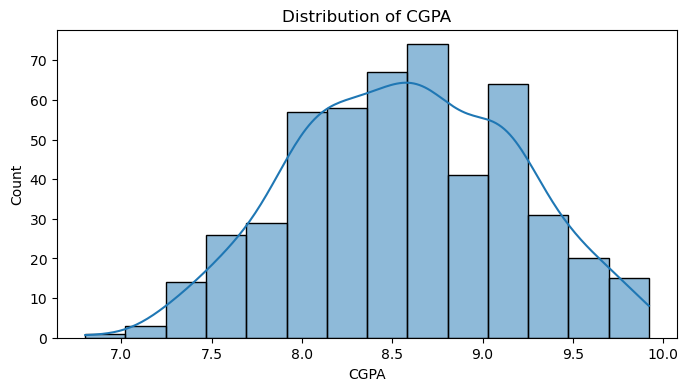

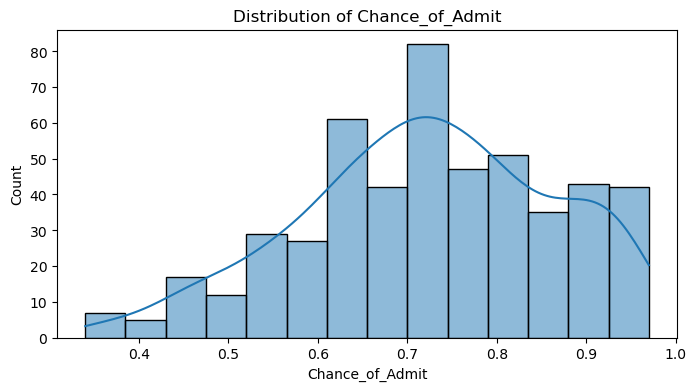

In [15]:
# Continuous Variables
continuous_vars = ['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']
for i in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df, x= i,kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [16]:
# Categorical Variable
categorical_vars = ['University_Rating', 'Research']

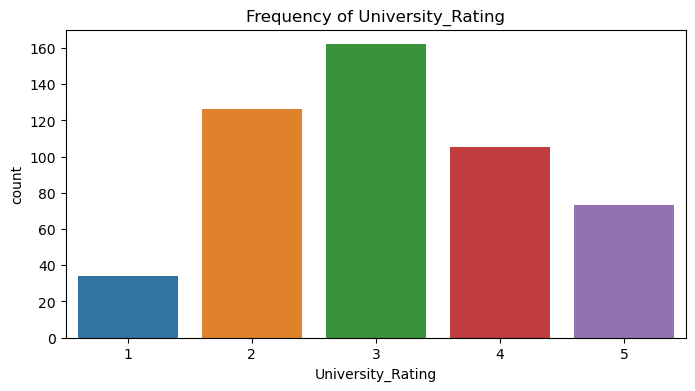

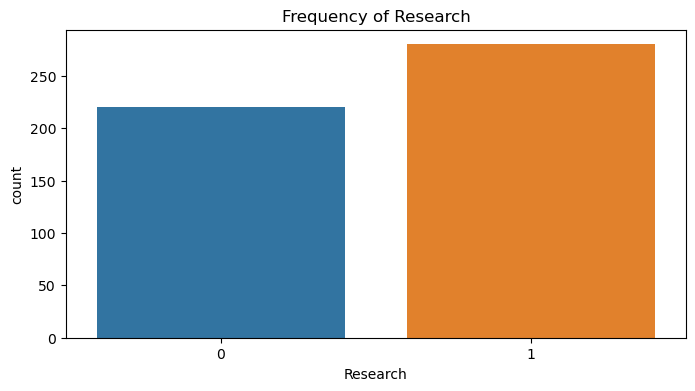

In [17]:
for i in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x= i,data = df)
    plt.title(f'Frequency of {i}')
    plt.show()

# Bivariate Analysis

In [18]:
sns.scatterplot?

In [19]:
continuous_vars

['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']

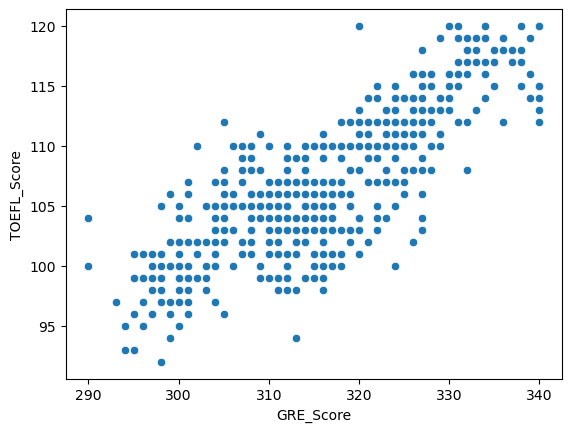

In [20]:
#checking the relationship between GRE_Score and TOEFL_Score
sns.scatterplot(x= 'GRE_Score',y= 'TOEFL_Score', data = df)
plt.show()

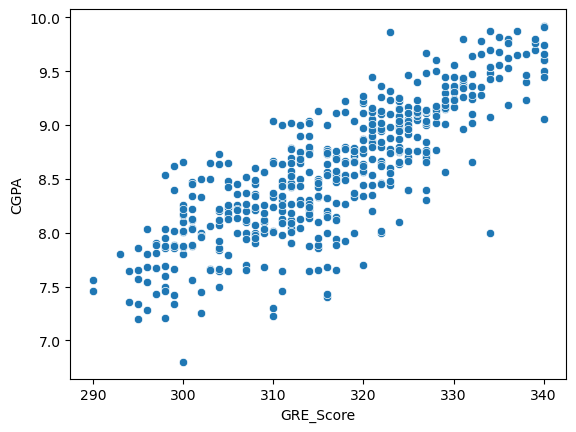

In [21]:
#checking realtionship between GRE_Score and CGPA
sns.scatterplot(x= 'GRE_Score',y= 'CGPA', data = df)
plt.show()

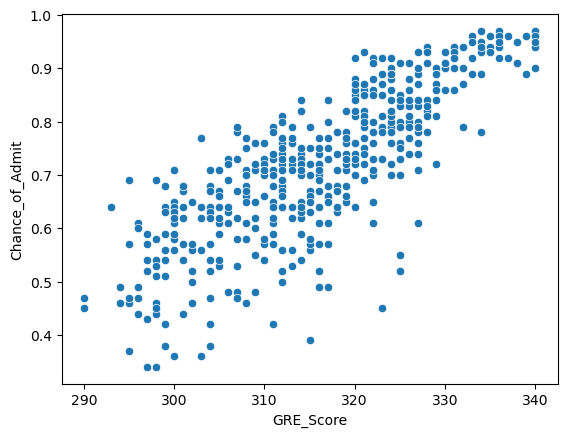

In [22]:
#checking relationship between GRE_Score and Chance_of_Admit
sns.scatterplot(x= 'GRE_Score',y= 'Chance_of_Admit', data = df)
plt.show()

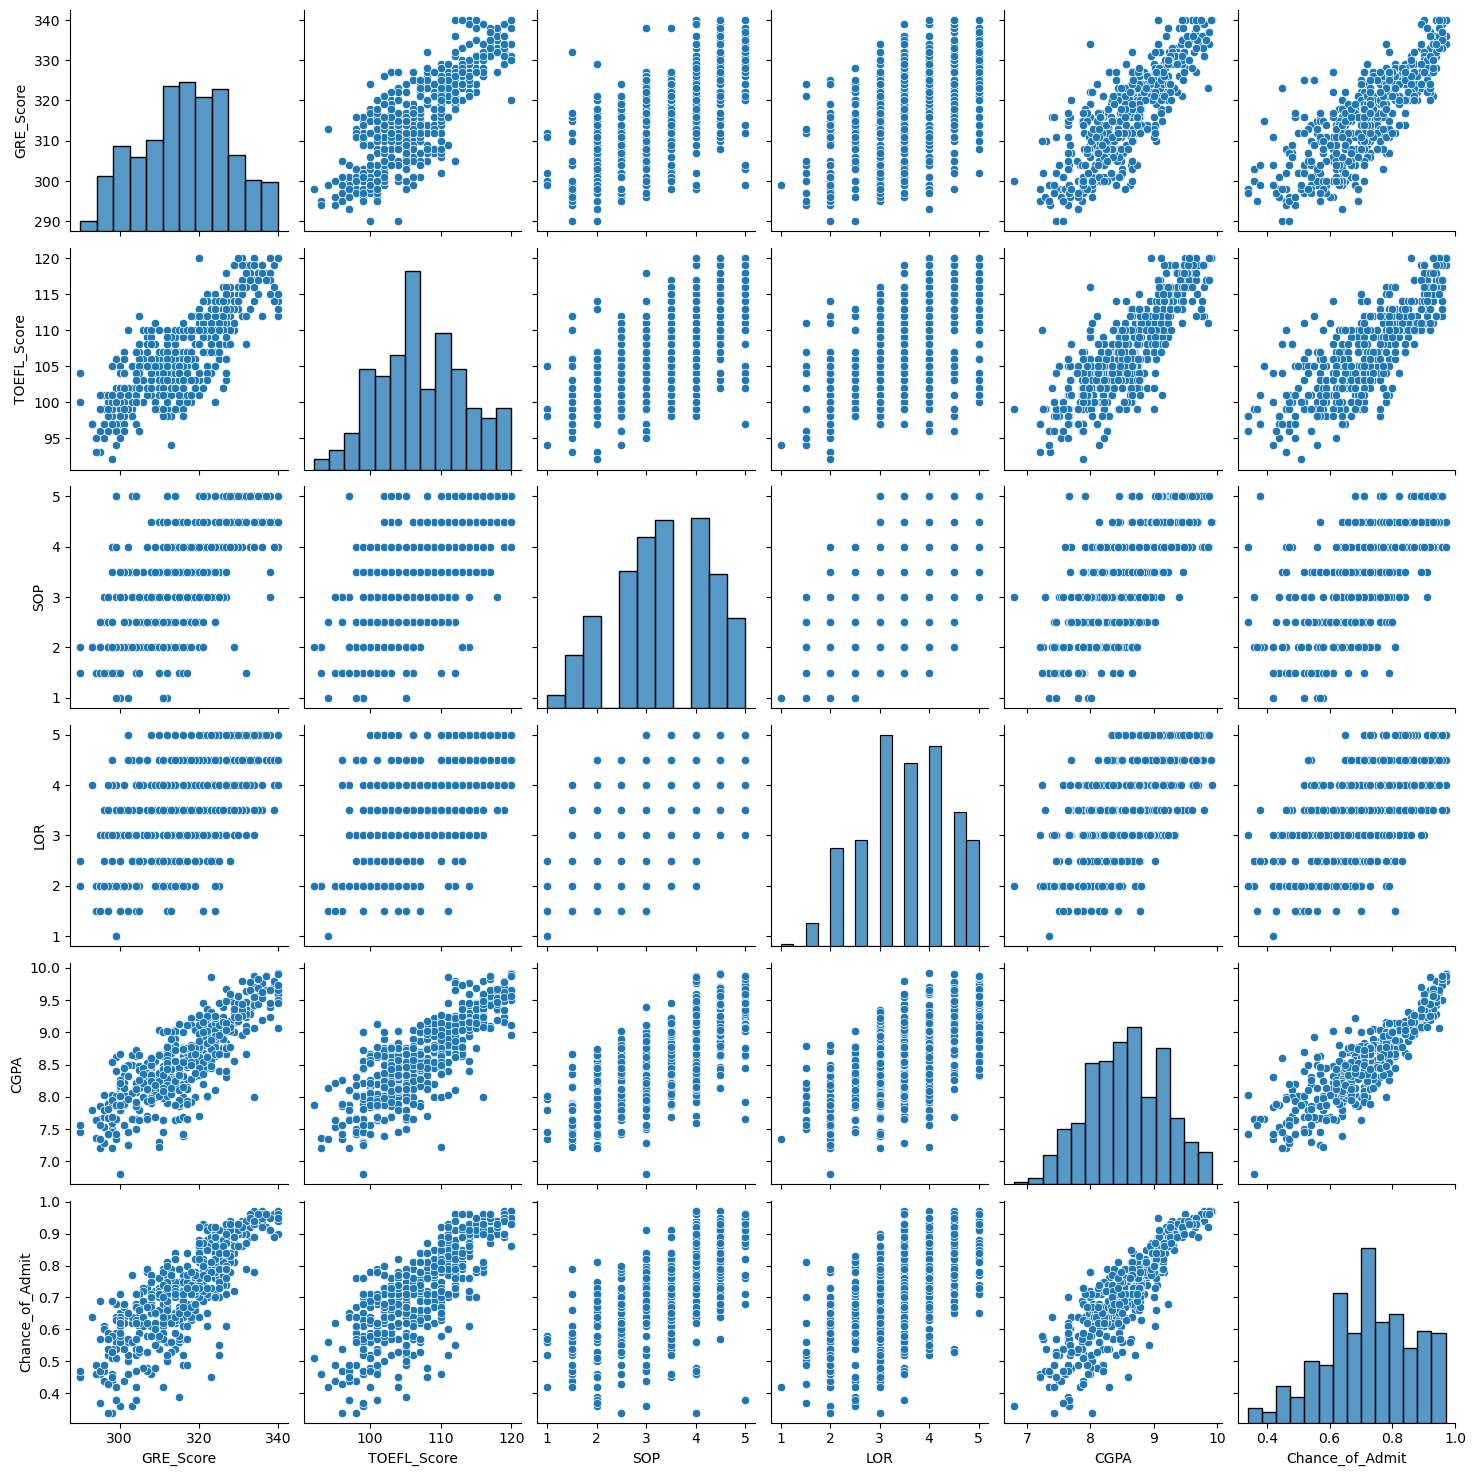

In [23]:
sns.pairplot(df[continuous_vars])
plt.show()

<AxesSubplot:>

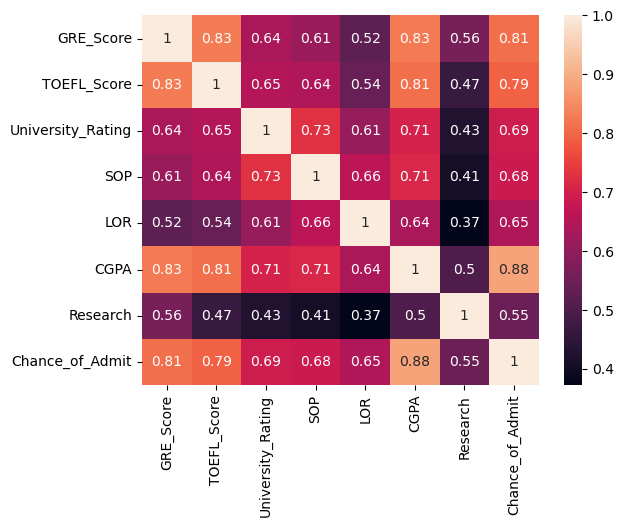

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

# Data Preprocessing

In [25]:
#checking missing values
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [26]:
#checking duplicates
df.duplicated().sum()

0

In [27]:
sns.boxplot?

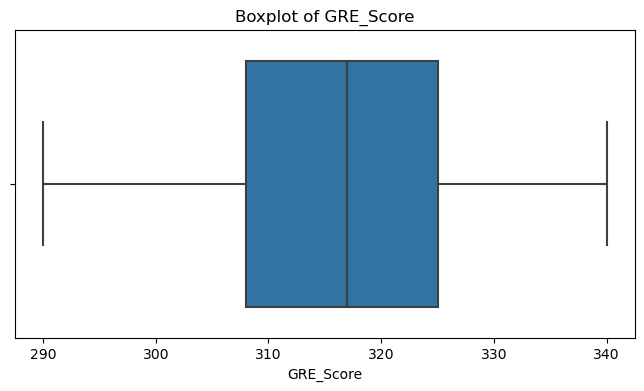

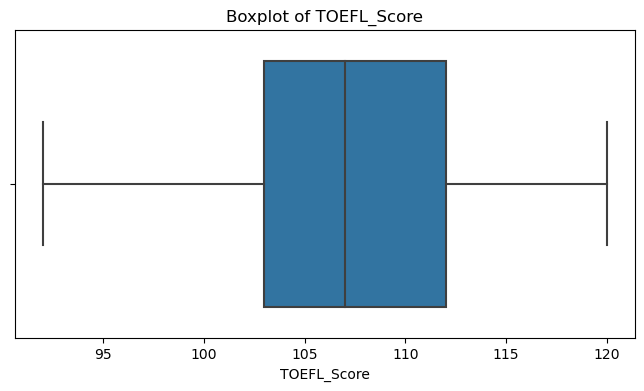

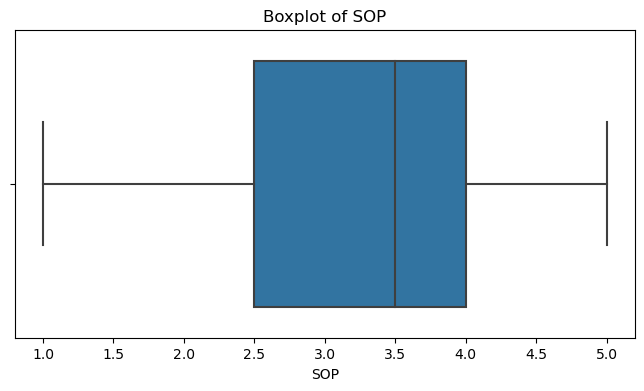

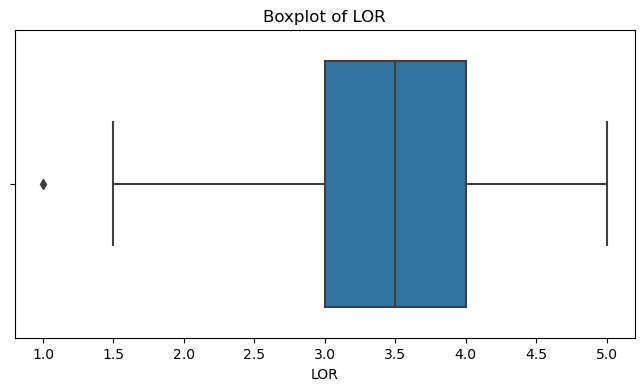

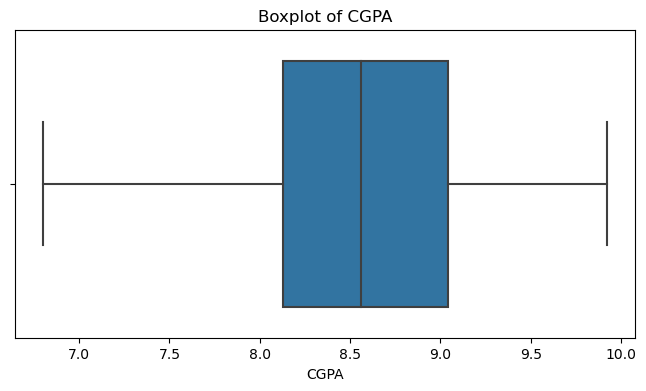

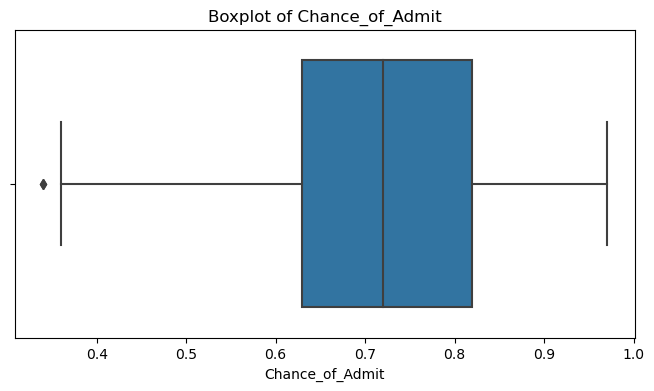

In [28]:
#checking outliers
for i in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = i, data = df)
    plt.title(f'Boxplot of {i}')
    plt.show()

In [29]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']: 
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [30]:
outliers = detect_outliers_iqr(df)

In [31]:
df['LOR'].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64

In [32]:
df['Chance_of_Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance_of_Admit, dtype: float64

In [33]:
# Print outlier rows
for col, rows in outliers.items():
    if not rows.empty:
        print(f"Outliers detected in {col}:\n", rows)

Outliers detected in LOR:
      GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
347        299           94                  1  1.0  1.0  7.34         0   

     Chance_of_Admit  
347             0.42  
Outliers detected in Chance_of_Admit:
      GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
92         298           98                  2  4.0  3.0  8.03         0   
376        297           96                  2  2.5  2.0  7.43         0   

     Chance_of_Admit  
92              0.34  
376             0.34  


# Outlier Treatment

* From the boxplot visualization and IQR method, it is observed that the columns 'LOR' and 'Chance_of_Admit' contain few outliers.
* I would use capping to treat the outliers.
* Capping is a technique used in data preprocessing to handle outliers in a dataset. It involves replacing extreme values that are considered outliers with a specified limit or boundary value. This can help to minimize the impact of outliers on statistical analyses and model performance.

In [34]:
def cap_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Cap the outliers
            df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

In [35]:
# Updating dataframe
df = cap_outliers(df)

In [36]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


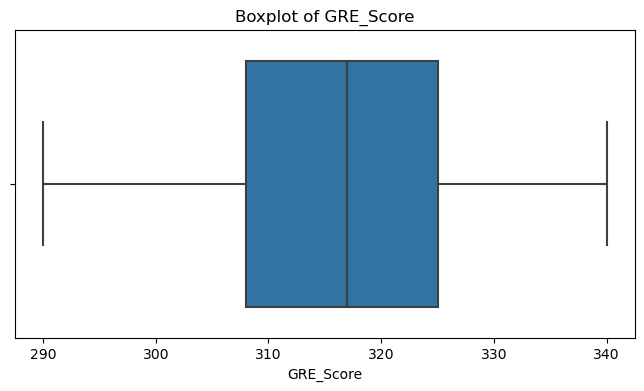

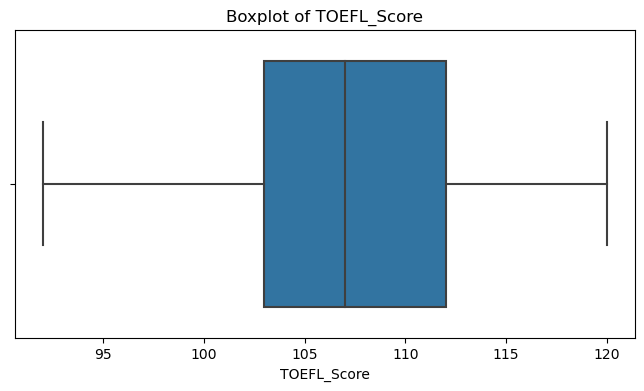

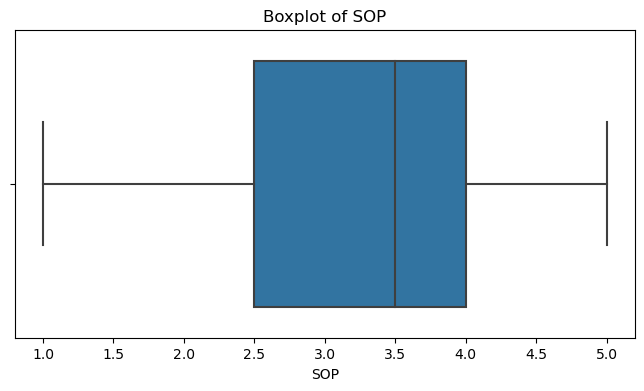

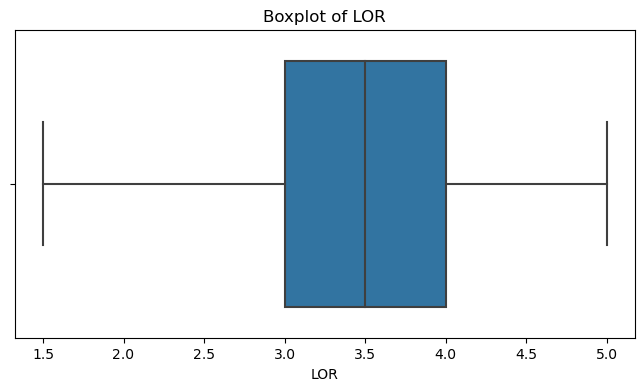

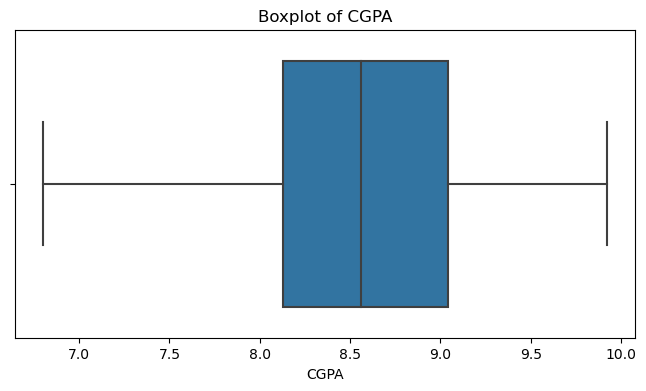

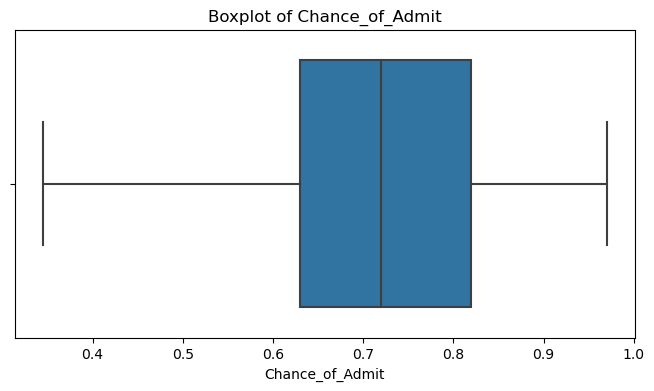

In [37]:
#checking outliers after capping
for i in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = i, data = df)
    plt.title(f'Boxplot of {i}')
    plt.show()

# The Outliers have been capped, as shown by the boxplot.

# Checking Correlation

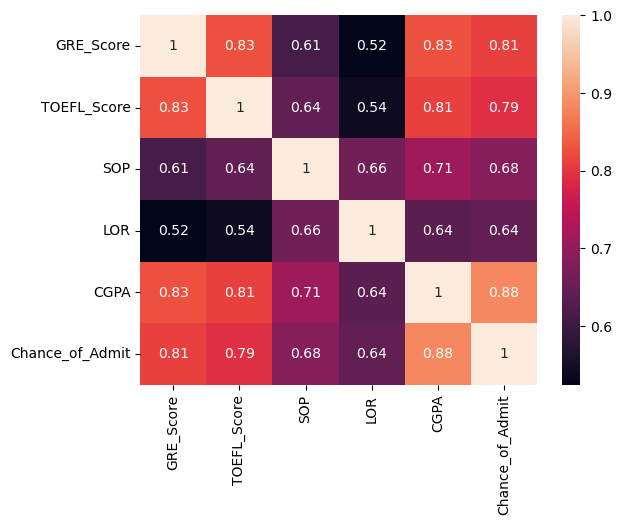

In [38]:
# Independent Variables
independent_vars = ['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']
corr_matrix = df[independent_vars].corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

### From the above output, it is seen that the correlation between all independent variables is below 90%, hence I would n't remove any variable.

# Data Preparation/Model Building

In [86]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [87]:
X = df[df.columns.drop('Chance_of_Admit')]
y = df['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          2.51e-146
Time:                        22:53:36   Log-Likelihood:                 573.90
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     392   BIC:                            -1100.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7222      0.003    248.091      0.0

* x1 : GRE_Score
* x2 : TOEFL_Score
* x3 : University_Rating
* x4 : SOP
* x5 : LOR
* x6 : CGPA
* x7 : Research

# Drop columns with p-value > 0.05 (if any) and re-train the model.

In [115]:
# Dropping University_Rating and SOP, as p-value >0.05 and re-training the model.

In [116]:
X_re = df[df.columns.drop(['Chance_of_Admit','University_Rating','SOP'])]
y_re = df['Chance_of_Admit']

X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled_re = scaler.fit_transform(X_train_re)

X_sm_re = sm.add_constant(X_tr_scaled_re)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train_re, X_sm_re).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     380.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          2.03e-148
Time:                        23:34:01   Log-Likelihood:                 572.75
No. Observations:                 400   AIC:                            -1133.
Df Residuals:                     394   BIC:                            -1110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7222      0.003    248.007      0.0

# Test the assumptions of linear regression

- Assumption of Linear Regression
  - Assumption of Linearity
  - Features are not multi-Collinear
   - Collinearity
   - Multi-Collinearity

  - Errors are normally Distributed
  - Heteroskedasticity should not exist
  - No Autocorrelation


# Assumption of Linearity : There should be linear relationship between independent and dependent variables.

In [88]:
dependent_vars = ['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA',]

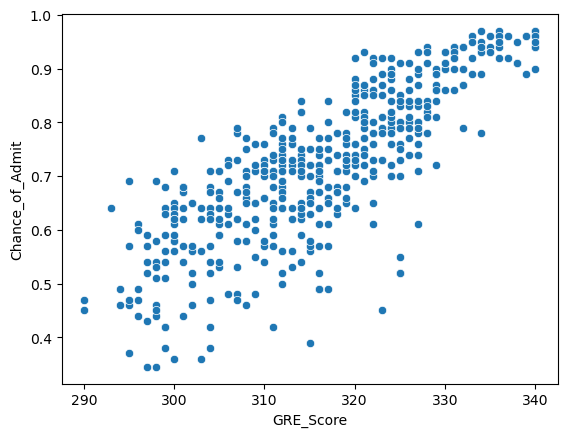

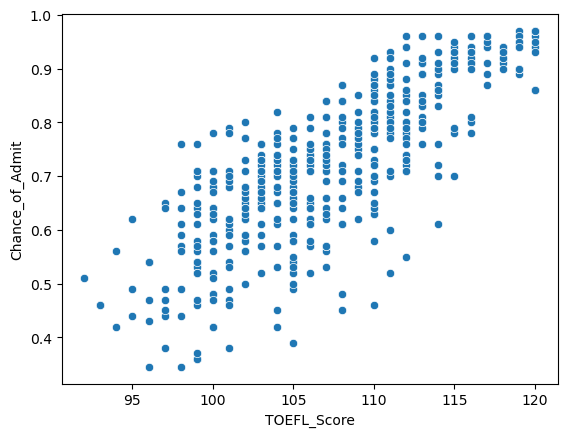

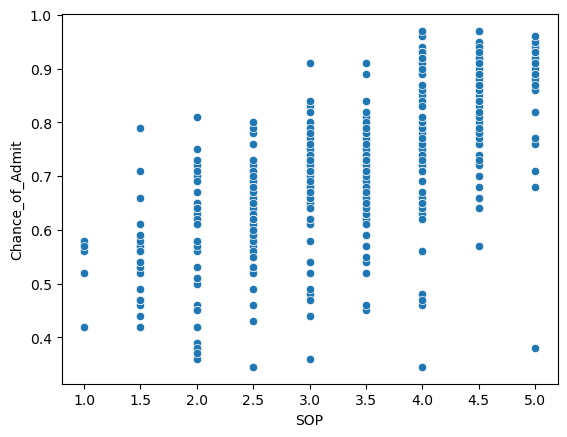

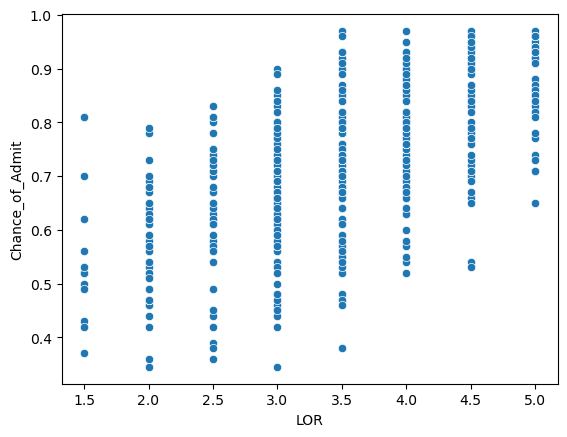

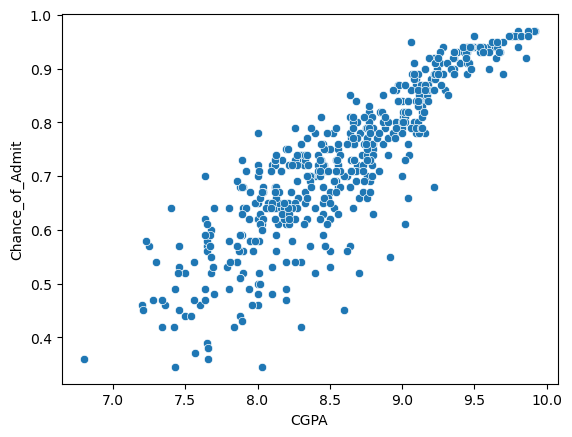

In [89]:
for i in dependent_vars:
    sns.scatterplot( x = i , y= 'Chance_of_Admit',data = df)
    plt.show()

# Multicollinearity and implementation
* When one or more input variables exhibhit strong correlation
* One variable is enough to be part of the model.

In [90]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.77
0,GRE_Score,4.24
1,TOEFL_Score,4.06
3,SOP,2.70
2,University_Rating,2.59
4,LOR,1.97
6,Research,1.47


### From the above output, it's seen that the VIF value for each variable is <5, which means Low Multicollinearity.Hence, we do not need to remove any variables.

# Errors are normally distributed

In [91]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

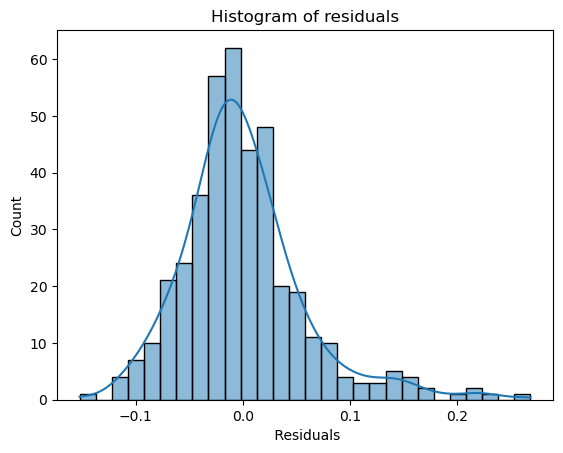

In [93]:
sns.histplot(errors, kde = True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

# From the histogram, it's observed that the errors are normally distributed.

# Shapiro Wilk Test

In [100]:
res = stats.shapiro(errors)
res.statistic

0.932253360748291

# Interpretation:

* Closer the value to 1, more is the normality.

* In this case, a value of 0.93 denotes a high level of normality for the error distribuiton.

# Heteroscedasticity should not exist

In [108]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

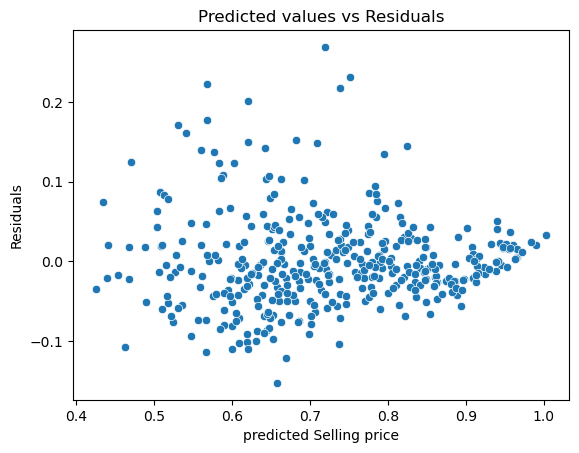

In [109]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

- Notice that As we go from left to right,the spread of  errors is almost constant

#### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are no outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions

### Using Goldfeld Quandt Test to check homoscedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [110]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.075607343077725), ('p-value', 0.30704195307839127)]

From the goldfeld-quandt test:
* F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
* p-value of 0.307 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
* Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

# Model's Performace

In [119]:
# Scale the test data
X_test_scaled_re = scaler.transform(X_test_re)
X_test_scaled_re = sm.add_constant(X_test_scaled_re)  # Add constant for intercept

# Make predictions
y_pred_re = sm_model.predict(X_test_scaled_re)

In [121]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_re, y_pred_re)

# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_re, y_pred_re))

# R-squared value
r_squared = r2_score(y_test_re, y_pred_re)

# Adjusted R-squared value
n = X_test_scaled_re.shape[0]  # Number of observations
p = X_test_scaled_re.shape[1] - 1  # Number of predictors (excluding constant)
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Square Error (RMSE): {rmse:.4f}')
print(f'R-squared: {r_squared:.4f}')
print(f'Adjusted R-squared: {adj_r_squared:.4f}')

Mean Absolute Error (MAE): 0.0473
Root Mean Square Error (RMSE): 0.0669
R-squared: 0.7906
Adjusted R-squared: 0.7794
